# Polynomial and Cubic Spline Interpolation

### Jennefer Maldonado

In this notebook, both polynomial and Cubic Spline interpolation will be used to estimate Runge's function, $\frac{1}{(1+25t^2)}$. 

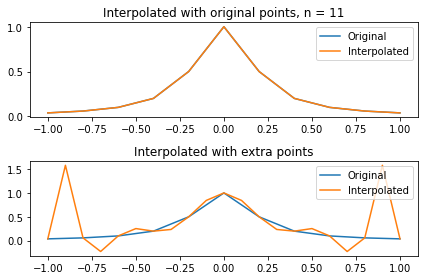

In [99]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sympy import *

def runge(t):
    t_vec = []
    for t_i in t:
        t_vec.append(1/(1+25*t_i**2))
    return np.array(t_vec)

def points(a, b, n):
    p = np.linspace(a, b, num=n)
    return p

# polynomial is the function used to complete
# polynomial interpolation
# params:
# t - point
# y - function value at point t
# n - number of pts for size of system
def polynomial(t, y, n):
    # create Vandermonde matrix of ones
    A = np.ones((n,n))
    # fill in with correct values
    tk = 0
    for row in range(0,n):
        p = 0
        for col in range(0,n):
            A[row][col] = t[tk]**p
            p+=1
        tk+=1
    #with the correct values in place we can solve
    # Ax = y
    x = np.linalg.solve(A,y)
    return x

def interpolate(poly,point):
    p = 0
    value = 0
    for coef in poly:
        value += coef*(point**p)
        p+=1
    return value

#pts = [-2,0,1]
#vals = [-27,-1,0]
#poly = polynomial(pts, vals,3)
#inter_pts = points(-2,0,5)
#i = []
#for point in inter_pts:
#    i.append(interpolate(poly, point))
#print(i)
#plt.plot(pts, vals)
#plt.plot(i, inter_pts)
#plt.show()
    
pts_11 = points(-1,1,11)
vals_11 = runge(pts_11)
poly_11 = polynomial(pts_11, vals_11, 11)
inter_11 = points(-1,1,21)
i_11 = []
for point in inter_11:
    i_11.append(interpolate(poly_11, point))
i_12 = []
for point in pts_11:
    i_12.append(interpolate(poly_11, point))
    
plt.subplot(211)
plt.plot(pts_11, vals_11, label = 'Original')
plt.plot(pts_11, i_12, label = 'Interpolated')
plt.title('Interpolated with original points, n = 11')
plt.legend()
plt.subplot(212)
plt.plot(pts_11, vals_11, label = 'Original')
plt.plot(inter_11 , i_11, label = 'Interpolated')
plt.title('Interpolated with extra points')
plt.legend()
plt.tight_layout()
plt.show()

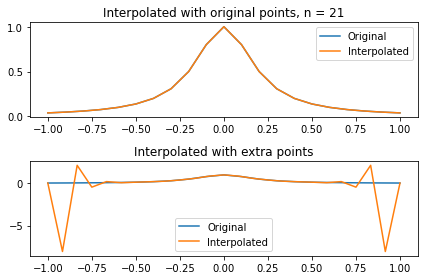

In [98]:
pts_21 = points(-1,1,21)
vals_21 = runge(pts_21)
poly_21 = polynomial(pts_21, vals_21, 21)
inter_21 = points(-1,1,25)
i_21 = []
for point in inter_21:
    i_21.append(interpolate(poly_21, point))
i_22 = []
for point in pts_21:
    i_22.append(interpolate(poly_21, point))
    
plt.subplot(211)
plt.plot(pts_21, vals_21, label = 'Original')
plt.plot(pts_21, i_22, label = 'Interpolated')
plt.title('Interpolated with original points, n = 21')
plt.legend()
plt.subplot(212)
plt.plot(pts_21, vals_21, label = 'Original')
plt.plot(inter_21 , i_21, label = 'Interpolated')
plt.title('Interpolated with extra points')
plt.legend()
plt.tight_layout()
plt.show()

### Cubic Spline
For better understanding of the algorithm I used http://www.maths.lth.se/na/courses/FMN081/FMN081-06/lecture11.pdf along with lecture notes.


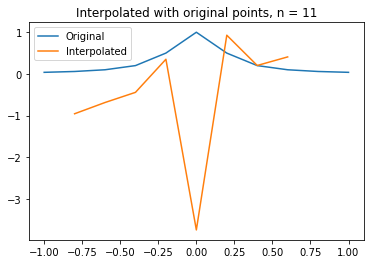

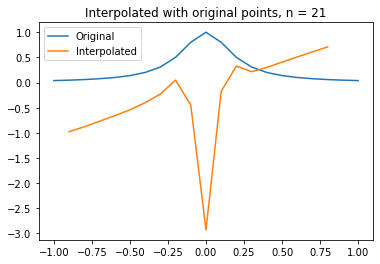

In [104]:
# Cubic Spline
def cubic(t,y,n):
    # set up correct format for A
    # size smaller than n because derivatives
    # at end points are equal to 0
    A = np.ones((n-2,n-2))
    for row in range(0,n-2):
        for col in range(0,n-2):
            if row == col:
                A[row][col] = 4
            elif abs(row-col) == 1:
                A[row][col] = 1
            else: 
                A[row][col] = 0

    # set up correct format for y
    y_vec = []
    for k in range(0,n-2):
        y_vec.append((6/(t[k+1]-t[k])) *(y[k+2]-2*y[k+1]+y[k]))
    # solve for x values
    x = np.linalg.solve(A,y_vec)
    return (x,y)

def cubic_interpol(point, xi, x_ip1, yi, y_ip1, ti, t_ip1):
    # solve for coefs a,b,c,d
    a = (x_ip1-xi)/6*(t_ip1-ti)
    b = xi/2
    c = (y_ip1 - yi)/(t_ip1-ti) - (t_ip1-ti)*(2*xi+x_ip1)/6
    d = yi
    st = a*(point-ti)**3+b*(point-ti)**2+c*(point-ti)+d
    return st

n = 11
cube_11 = cubic(pts_11, vals_11, n)
xs = cube_11[0]
ys = cube_11[1]
cubic11 = []
for i in range(0,n-3):
    xi = xs[i]
    x_ip1 = xs[i+1]
    yi = ys[i]
    y_ip1 = ys[i+1]
    ti = vals_11[i]
    t_ip1 = vals_11[i+1]
    cubic11.append(cubic_interpol(pts_11[i], xi, x_ip1, yi, y_ip1, ti, t_ip1))

pltpts = pts_11[1:-2]

plt.plot(pts_11, vals_11, label = 'Original')
plt.plot(pltpts, cubic11, label = 'Interpolated')
plt.title('Interpolated with original points, n = 11')
plt.legend()
plt.show()

n = 21
cube_21 = cubic(pts_21, vals_21, n)
xs = cube_21[0]
ys = cube_21[1]
cubic21 = []
for i in range(0,n-3):
    xi = xs[i]
    x_ip1 = xs[i+1]
    yi = ys[i]
    y_ip1 = ys[i+1]
    ti = vals_21[i]
    t_ip1 = vals_21[i+1]
    cubic21.append(cubic_interpol(pts_21[i], xi, x_ip1, yi, y_ip1, ti, t_ip1))

pltpts = pts_21[1:-2]

plt.plot(pts_21, vals_21, label = 'Original')
plt.plot(pltpts, cubic21, label = 'Interpolated')
plt.title('Interpolated with original points, n = 21')
plt.legend()
plt.show()